<h1>아프리카 돼지 열병과 돼지 관련 수치 연관성</h1>

---

<h1>introduction</h1>

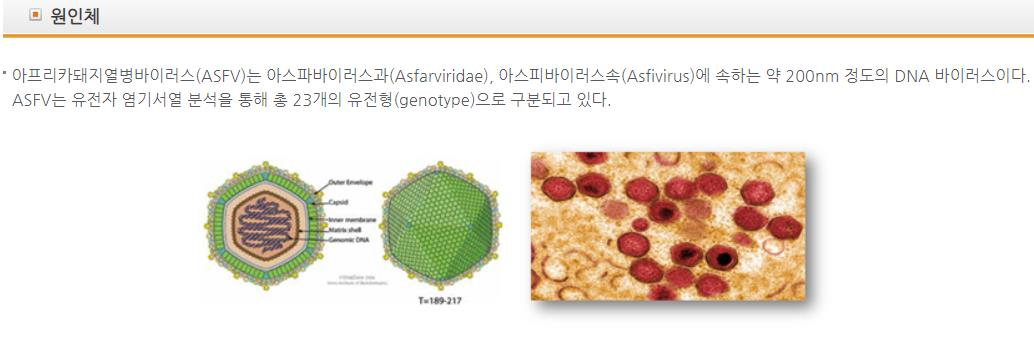

In [1]:
#데이터 가져오기 및 method 설정
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython import display

number_of_pig = pd.read_csv('돼지_시도_월령별_성별_마리수.csv', encoding = 'cp949', index_col = ['시도별'])
ASF_pig = pd.read_csv('야생멧돼지 ASF 발생현황(2019-2021).csv', encoding = 'cp949')
pig_killed = pd.read_csv('축종별_시도별_도축실적.csv', encoding = 'cp949', index_col = ['도축별(1)','구분별(1)'])

In [2]:
ASF_pig = ASF_pig.dropna()
ASF_pig = ASF_pig.drop('연번', axis = 1)
ASF_pig.head(5)

,신고,확진,시도,시군구,주소,암수,연령,지형,울타리_번호
1,10.2,10.3,경기,연천,신서면_도밀리_944,암,6개월_미만,_,_
2,10.11,10.12,경기,연천,왕징면_강서리_986,암,1년,연천1,연천2
3,10.11,10.12,강원,철원,원남면_진현리_115,no_data,1년,철원1,철원1
4,10.12,10.12,강원,철원,원남면_진현리_25,수,6개월_미만,철원1,철원1
5,10.12,10.12,강원,철원,원남면_진현리_21,수,2년_이상,철원1,철원1


In [3]:
number_of_pig.T.head(5)

시도별,연령,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주도
2017_1분기,합계,11004533,0,6811,10100,42638,8443,111,34167,92234,1925487,483763,622693,2219844,1319177,1016783,1401514,1276928,543840
2017_1분기.1,2개월미만,3422004,0,1713,2231,13306,2675,10,8724,27547,572486,138857,185583,665375,414416,341261,436386,417359,194075
2017_1분기.2,2~4개월,3283971,0,1825,4119,12190,2896,55,10668,22043,603737,145835,185611,641607,413475,288425,427816,373324,150346
2017_1분기.3,4~6개월,3214787,0,2653,2868,12933,2008,30,12721,33971,572129,149066,190191,686890,363427,282588,395052,369447,138813
2017_1분기.4,6~8개월:계,120295,0,44,22,262,88,1,249,625,16742,6267,7006,27015,16097,11905,17572,11297,5104


In [4]:
pig_killed.head(5)

2018. 05 2018. 05.1 2018. 05.2 2018. 05.3 2018. 05.4 2018. 05.5  \
도축별(1) 구분별(1)                                                                   
도축별(1) 구분별(1)       전국         서울         부산         대구         인천         광주   
소 소계   당월        68071          0          0        546       1317       1136   
       누계       369850          0          0       3411       6798       5829   
한우     당월        57600          0          0        341        143       1104   
       누계       313786          0          0       2081       1057       5647   

              2018. 05.6 2018. 05.7 2018. 05.8 2018. 05.9  ... 2021. 01.7  \
도축별(1) 구분별(1)                                              ...              
도축별(1) 구분별(1)         대전         울산         경기         강원  ...         울산   
소 소계   당월            694       1013      18113       2402  ...       1108   
       누계           3928       5337     100315      13729  ...       1108   
한우     당월            693       1013      12183       2112  ...       1105   
       누계           3920       5337      68948      11983  ...       1105   

              2021. 01.8 2021. 01.9 2021. 01.10 2021. 01.11 2021. 01.12  \
도축별(1) 구분별(1)                                                             
도축별(1) 구분별(1)         경기         강원          충북          충남          전북   
소 소계   당월          29346       4545       20166        9313        2121   
       누계          29346       4545       20166        9313        2121   
한우     당월          21395       4234       19367        8326        2105   
       누계          21395       4234       19367        8326        2105   

              2021. 01.13 2021. 01.14 2021. 01.15 2021. 01.16  
도축별(1) 구분별(1)                                                  
도축별(1) 구분별(1)          전남          경북          경남          제주  
소 소계   당월            8468       14787       16532         601  
       누계            8468       14787       16532         601  
한우     당월            8114       13901       15607         553  
       누계            8114       13901       15607         553  

[5 rows x 561 columns]

---

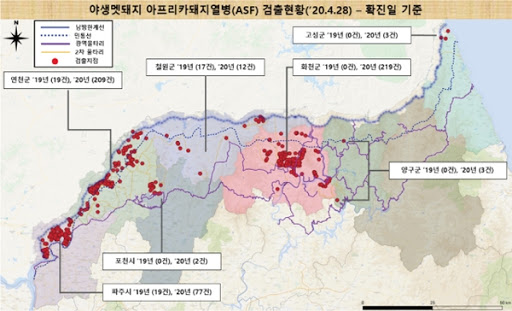

([<matplotlib.axis.XTick at 0x2a3e0814d00>,
 [Text(0, 0, '~ 6month'),
  Text(0, 0, '6month ~ 1year'),
  Text(0, 0, '1year ~ 2year'),
  Text(0, 0, '2year ~ 3year'),
  Text(0, 0, '3year ~')])

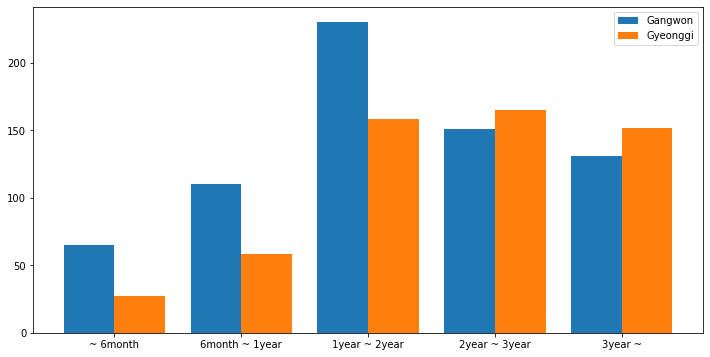

In [5]:
# 시도 지역별 ASF 비율 - 연령별
ASF_pig_1 = ASF_pig.drop(['신고', '확진', '주소', '지형', '울타리_번호', '암수', '시군구'], axis = 1)

# 시도별이라기 보다 ASF가 존재하는 곳은 산간지방인 경기도와 강원도 밖에 없으므로 두 지역으로 나누어 살펴본다.
# 경기도
ASF_pig_1_Gyenggi = ASF_pig_1.query("시도 == '경기'")

# 경기도 지역 6개월 미만인 경우
ASF_Gyenggi_6monthless1 = len(ASF_pig_1_Gyenggi.query("연령 == '6개월_미만'"))
ASF_Gyenggi_6monthless2 = len(ASF_pig_1_Gyenggi.query("연령 == '1개월'"))
ASF_Gyenggi_6monthless3 = len(ASF_pig_1_Gyenggi.query("연령 == '2개월'"))
ASF_Gyenggi_6monthless4 = len(ASF_pig_1_Gyenggi.query("연령 == '3개월'"))
ASF_Gyenggi_6monthless5 = len(ASF_pig_1_Gyenggi.query("연령 == '4개월'"))
ASF_Gyenggi_6monthless6 = len(ASF_pig_1_Gyenggi.query("연령 == '5개월'"))
# 경기도 지역 6개월 이상 1년 미만인 경우
ASF_Gyenggi_6monthmore_1yearless1 = len(ASF_pig_1_Gyenggi.query("연령 == '6개월'"))
ASF_Gyenggi_6monthmore_1yearless2 = len(ASF_pig_1_Gyenggi.query("연령 == '7개월'"))
ASF_Gyenggi_6monthmore_1yearless3 = len(ASF_pig_1_Gyenggi.query("연령 == '8개월'"))
ASF_Gyenggi_6monthmore_1yearless4 = len(ASF_pig_1_Gyenggi.query("연령 == '9개월'"))
ASF_Gyenggi_6monthmore_1yearless5 = len(ASF_pig_1_Gyenggi.query("연령 == '10개월'"))
ASF_Gyenggi_6monthmore_1yearless6 = len(ASF_pig_1_Gyenggi.query("연령 == '11개월'"))
# 경기도 지역 1년 이상 2년 미만인 경우
ASF_Gyenggi_1yearmore_2yearless1 = len(ASF_pig_1_Gyenggi.query("연령 == '1년'"))
ASF_Gyenggi_1yearmore_2yearless2 = len(ASF_pig_1_Gyenggi.query("연령 == '1년_이상'"))
# 경기도 지역 2년 이상 3년 미만인 경우       
ASF_Gyenggi_2yearmore_3yearless1 = len(ASF_pig_1_Gyenggi.query("연령 == '2년'"))
ASF_Gyenggi_2yearmore_3yearless2 = len(ASF_pig_1_Gyenggi.query("연령 == '2년_이상'"))
# 경기도 지역 3년 이상인 경우
ASF_Gyenggi_3yearmore1 = len(ASF_pig_1_Gyenggi.query("연령 == '3년'"))
ASF_Gyenggi_3yearmore2= len(ASF_pig_1_Gyenggi.query("연령 == '4년'"))
ASF_Gyenggi_3yearmore3 = len(ASF_pig_1_Gyenggi.query("연령 == '5년'"))

# 각 개월 수(및 연 수)에 해당하는 index를 할당하여 새로운 DataFrame으로 정리
Gyengi_pig_age = pd.DataFrame(data = 
                              {"~ 6month" : [ASF_Gyenggi_6monthless1 + ASF_Gyenggi_6monthless2 + ASF_Gyenggi_6monthless3 
                                          + ASF_Gyenggi_6monthless4 + ASF_Gyenggi_6monthless5 + ASF_Gyenggi_6monthless6], 
                               "6month ~ 1year" : [ASF_Gyenggi_6monthmore_1yearless1 + ASF_Gyenggi_6monthmore_1yearless2 +
                                              ASF_Gyenggi_6monthmore_1yearless3 + ASF_Gyenggi_6monthmore_1yearless4 + 
                                              ASF_Gyenggi_6monthmore_1yearless5 + ASF_Gyenggi_6monthmore_1yearless6], 
                               "1year ~ 2year" : [ASF_Gyenggi_1yearmore_2yearless1+ASF_Gyenggi_1yearmore_2yearless2], 
                               "2year ~ 3year" : [ASF_Gyenggi_2yearmore_3yearless1 + ASF_Gyenggi_2yearmore_3yearless2],
                               "3year ~" : [ASF_Gyenggi_3yearmore1 + ASF_Gyenggi_3yearmore2 
                                         + ASF_Gyenggi_3yearmore3]}, 
                              index = ["경기"])

##########################################################################################################################

# 강원도
ASF_pig_1_Gangwon = ASF_pig_1.query("시도 == '강원'")

# 경원도 지역 6개월 미만인 경우
ASF_Gangwon_6monthless1 = len(ASF_pig_1_Gangwon.query("연령 == '6개월_미만'"))
ASF_Gangwon_6monthless2 = len(ASF_pig_1_Gangwon.query("연령 == '1개월'"))
ASF_Gangwon_6monthless3 = len(ASF_pig_1_Gangwon.query("연령 == '2개월'"))
ASF_Gangwon_6monthless4 = len(ASF_pig_1_Gangwon.query("연령 == '3개월'"))
ASF_Gangwon_6monthless5 = len(ASF_pig_1_Gangwon.query("연령 == '4개월'"))
ASF_Gangwon_6monthless6 = len(ASF_pig_1_Gangwon.query("연령 == '5개월'"))
# 경원도 지역 6개월 이상 1년 미만인 경우
ASF_Gangwon_6monthmore_1yearless1 = len(ASF_pig_1_Gangwon.query("연령 == '6개월'"))
ASF_Gangwon_6monthmore_1yearless2 = len(ASF_pig_1_Gangwon.query("연령 == '7개월'"))
ASF_Gangwon_6monthmore_1yearless3 = len(ASF_pig_1_Gangwon.query("연령 == '8개월'"))
ASF_Gangwon_6monthmore_1yearless4 = len(ASF_pig_1_Gangwon.query("연령 == '9개월'"))
ASF_Gangwon_6monthmore_1yearless5 = len(ASF_pig_1_Gangwon.query("연령 == '10개월'"))
ASF_Gangwon_6monthmore_1yearless6 = len(ASF_pig_1_Gangwon.query("연령 == '11개월'"))
# 경원도 지역 1년 이상 2년 미만인 경우
ASF_Gangwon_1yearmore_2yearless1 = len(ASF_pig_1_Gangwon.query("연령 == '1년'"))
ASF_Gangwon_1yearmore_2yearless2 = len(ASF_pig_1_Gangwon.query("연령 == '1년_이상'"))
# 경원도 지역 2년 이상 3년 미만인 경우                                
ASF_Gangwon_2yearmore_3yearless1 = len(ASF_pig_1_Gangwon.query("연령 == '2년'"))
ASF_Gangwon_2yearmore_3yearless2 = len(ASF_pig_1_Gangwon.query("연령 == '2년_이상'"))
# 경원도 지역 3년 이상인 경우
ASF_Gangwon_3yearmore1 = len(ASF_pig_1_Gangwon.query("연령 == '3년'"))
ASF_Gangwon_3yearmore2= len(ASF_pig_1_Gangwon.query("연령 == '4년'"))
ASF_Gangwon_3yearmore3 = len(ASF_pig_1_Gangwon.query("연령 == '5년'"))

# 각 개월 수(및 연 수)에 해당하는 index를 할당하여 새로운 DataFrame으로 정리
Gangwon_pig_age = pd.DataFrame(data = 
                              {"~ 6month" : [ASF_Gangwon_6monthless1 + ASF_Gangwon_6monthless2 + ASF_Gangwon_6monthless3 
                                          + ASF_Gangwon_6monthless4 + ASF_Gangwon_6monthless5 + ASF_Gangwon_6monthless6], 
                               "6month ~ 1year" : [ASF_Gangwon_6monthmore_1yearless1 + ASF_Gangwon_6monthmore_1yearless2 +
                                              ASF_Gangwon_6monthmore_1yearless3 + ASF_Gangwon_6monthmore_1yearless4 + 
                                              ASF_Gangwon_6monthmore_1yearless5 + ASF_Gangwon_6monthmore_1yearless6], 
                               "1year ~ 2year" : [ASF_Gangwon_1yearmore_2yearless1+ASF_Gangwon_1yearmore_2yearless2], 
                               "2year ~ 3year" : [ASF_Gangwon_2yearmore_3yearless1 + ASF_Gangwon_2yearmore_3yearless2],
                               "3year ~" : [ASF_Gangwon_3yearmore1 + ASF_Gangwon_3yearmore2 
                                         + ASF_Gangwon_3yearmore3]},
                               index = ["강원"])

# 두 데이터 합치기
pig_age_dataframe = pd.concat([Gangwon_pig_age, Gyengi_pig_age])

# 합친 데이터 그래프로 나타내기
plt.figure(figsize = (12,6))
x = np.arange(5)
w = 0.4
plt.bar(x,pig_age_dataframe.loc['강원'], width = w, label = 'Gangwon')
plt.bar(x + w, pig_age_dataframe.loc['경기'], width = w, label = 'Gyeonggi')
plt.legend()
plt.xticks(x + w / 2 , pig_age_dataframe.T.index)

# 1년에서 2년 사이의 돼지들이 ASF에 가장 많이 영향을 받은 것으로 보임

([<matplotlib.axis.XTick at 0x2a3e0fadc40>,
 [Text(0, 0, 'he(Male)'), Text(0, 0, 'she(Female)')])

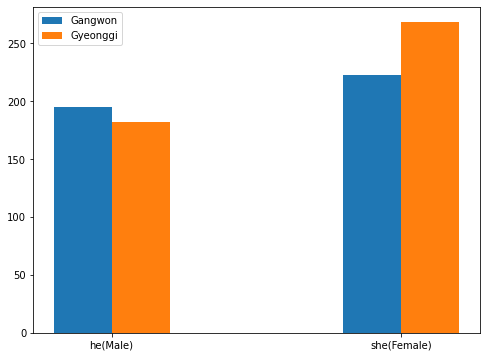

In [6]:
# 시도 지역별 ASF 비율 - 암수별
ASF_pig_2 = ASF_pig.drop(['신고', '확진', '주소', '지형', '울타리_번호', '연령', '시군구'], axis = 1)
# 경기도
ASF_pig_2_Gyenggi = ASF_pig_2.query("시도 == '경기'")
# 경기도 지역 암수 총합
ASF_Gyenggi_M = len(ASF_pig_2_Gyenggi.query("암수 == '수'"))
ASF_Gyenggi_F = len(ASF_pig_2_Gyenggi.query("암수 == '암'"))

# 암컷과 수컷에 해당하는 index를 할당하여 새로운 DataFrame으로 정리
Gyenggi_pig_pair = pd.DataFrame(data = 
                              {"he(Male)" : [ASF_Gyenggi_M],
                              "she(Female)" : [ASF_Gyenggi_F]}, 
                              index = ["경기"])
# Gyenggi_pig_pair['no_data'] = len(ASF_pig_2_Gyenggi.query("암수 == 'no_data'"))
# no_data에 해당하는 부분도 하려고 하였으나 no_data 부분이 암컷과 수컷의 수치만큼 많았기에 제외한다.

###########################################################################################
# 강원도
ASF_pig_2_Gangwon = ASF_pig_2.query("시도 == '강원'")
# 강원도 지역 암수 총합
ASF_Gangwon_M = len(ASF_pig_2_Gangwon.query("암수 == '수'"))
ASF_Gangwon_F = len(ASF_pig_2_Gangwon.query("암수 == '암'"))

# 암컷과 수컷에 해당하는 index를 할당하여 새로운 DataFrame으로 정리
Gangwon_pig_pair = pd.DataFrame(data = 
                              {"he(Male)" : [ASF_Gangwon_M],
                              "she(Female)" : [ASF_Gangwon_F]}, 
                              index = ["강원"])

# Gangwon_pig_pair['no_data'] = len(ASF_pig_2_Gangwon.query("암수 == 'no_data'"))
# no_data에 해당하는 부분도 하려고 하였으나 no_data 부분이 암컷과 수컷의 수치만큼 많았기에 제외한다.

# 데이터 합치기
pig_pair_dataframe = pd.concat([Gangwon_pig_pair, Gyenggi_pig_pair])
pig_pair_dataframe

# 그래프 그리기
plt.figure(figsize = (8,6))
x = np.arange(2)
w = 0.2
plt.bar(x, pig_pair_dataframe.loc['강원'], width = w, label = 'Gangwon')
plt.bar(x + w, pig_pair_dataframe.loc['경기'], width = w, label = 'Gyeonggi')
plt.legend()

plt.xticks(x + w / 2 , pig_pair_dataframe.T.index)

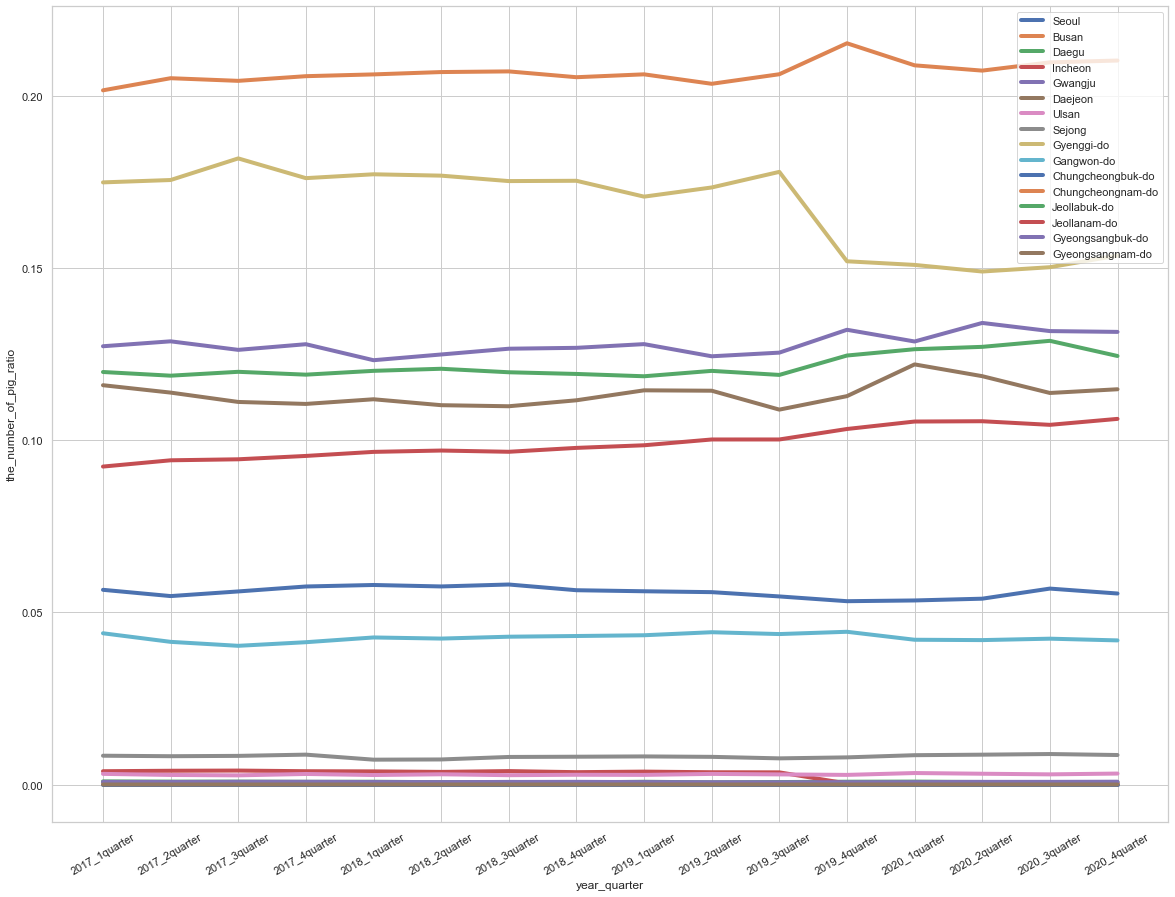

In [7]:
# 분기별 돼지 사육수 확인

number_of_pig_all = number_of_pig.T.query("연령 == '합계'")
number_of_pig_all1 = number_of_pig_all.drop(['연령'], axis = 1)
number_of_pig_all1 = number_of_pig_all1.astype('int64')

# 수치값이 너무 컸기에 비율로 계산
number_Series_1  = number_of_pig_all1.T['2017_1분기'].map(lambda x: x/number_of_pig_all1.T.iloc[0,0])
number_Series_2  = number_of_pig_all1.T['2017_2분기'].map(lambda x: x/number_of_pig_all1.T.iloc[0,1])
number_Series_3  = number_of_pig_all1.T['2017_3분기'].map(lambda x: x/number_of_pig_all1.T.iloc[0,2])
number_Series_4  = number_of_pig_all1.T['2017_4분기'].map(lambda x: x/number_of_pig_all1.T.iloc[0,3])
number_Series_5  = number_of_pig_all1.T['2018_1분기'].map(lambda x: x/number_of_pig_all1.T.iloc[0,4])
number_Series_6  = number_of_pig_all1.T['2018_2분기'].map(lambda x: x/number_of_pig_all1.T.iloc[0,5])
number_Series_7  = number_of_pig_all1.T['2018_3분기'].map(lambda x: x/number_of_pig_all1.T.iloc[0,6])
number_Series_8  = number_of_pig_all1.T['2018_4분기'].map(lambda x: x/number_of_pig_all1.T.iloc[0,7])
number_Series_9  = number_of_pig_all1.T['2019_1분기'].map(lambda x: x/number_of_pig_all1.T.iloc[0,8])
number_Series_10 = number_of_pig_all1.T['2019_2분기'].map(lambda x: x/number_of_pig_all1.T.iloc[0,9])
number_Series_11 = number_of_pig_all1.T['2019_3분기'].map(lambda x: x/number_of_pig_all1.T.iloc[0,10])
number_Series_12 = number_of_pig_all1.T['2019_4분기'].map(lambda x: x/number_of_pig_all1.T.iloc[0,11])
number_Series_13 = number_of_pig_all1.T['2020_1분기'].map(lambda x: x/number_of_pig_all1.T.iloc[0,12])
number_Series_14 = number_of_pig_all1.T['2020_2분기'].map(lambda x: x/number_of_pig_all1.T.iloc[0,13])
number_Series_15 = number_of_pig_all1.T['2020_3분기'].map(lambda x: x/number_of_pig_all1.T.iloc[0,14])
number_Series_16 = number_of_pig_all1.T['2020_4분기'].map(lambda x: x/number_of_pig_all1.T.iloc[0,15])

# 데이터 합치기
number_of_pig_all_data = pd.DataFrame(number_Series_1)
number_of_pig_all_data = number_of_pig_all_data.merge(number_Series_2,  on = ['시도별'])
number_of_pig_all_data = number_of_pig_all_data.merge(number_Series_3,  on = ['시도별'])
number_of_pig_all_data = number_of_pig_all_data.merge(number_Series_4,  on = ['시도별'])
number_of_pig_all_data = number_of_pig_all_data.merge(number_Series_5,  on = ['시도별'])
number_of_pig_all_data = number_of_pig_all_data.merge(number_Series_6,  on = ['시도별'])
number_of_pig_all_data = number_of_pig_all_data.merge(number_Series_7,  on = ['시도별'])
number_of_pig_all_data = number_of_pig_all_data.merge(number_Series_8,  on = ['시도별'])
number_of_pig_all_data = number_of_pig_all_data.merge(number_Series_9,  on = ['시도별'])
number_of_pig_all_data = number_of_pig_all_data.merge(number_Series_10, on = ['시도별'])
number_of_pig_all_data = number_of_pig_all_data.merge(number_Series_11, on = ['시도별'])
number_of_pig_all_data = number_of_pig_all_data.merge(number_Series_12, on = ['시도별'])
number_of_pig_all_data = number_of_pig_all_data.merge(number_Series_13, on = ['시도별'])
number_of_pig_all_data = number_of_pig_all_data.merge(number_Series_14, on = ['시도별'])
number_of_pig_all_data = number_of_pig_all_data.merge(number_Series_15, on = ['시도별'])
number_of_pig_all_data = number_of_pig_all_data.merge(number_Series_16, on = ['시도별'])

region_label = ['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju', 'Daejeon', 'Ulsan', 
                'Sejong', 'Gyenggi-do', 'Gangwon-do', 'Chungcheongbuk-do', 'Chungcheongnam-do',
                'Jeollabuk-do', 'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do']

plt.figure(figsize = (20,15))
sns.set_theme(style="whitegrid")
for i in range(16):
    sns.lineplot(x = np.arange(16), y= number_of_pig_all_data.iloc[i+1,:], palette="tab10", linewidth=4,
                 label = region_label[i])

plt.xlabel('year_quarter')
plt.xticks(np.arange(16),
           ['2017_1quarter', '2017_2quarter', '2017_3quarter', '2017_4quarter', 
            '2018_1quarter', '2018_2quarter', '2018_3quarter', '2018_4quarter',
            '2019_1quarter', '2019_2quarter', '2019_3quarter', '2019_4quarter',
            '2020_1quarter', '2020_2quarter', '2020_3quarter', '2020_4quarter'], rotation =30)

plt.ylabel('the_number_of_pig_ratio')
plt.legend()

# 2019년 3분기부터 2020년 2분기 까지 감소치를 보임. 하지만 이는 경기도만 해당하고 다른 지역은 해당하지 않다는 점을 보아
# 우리나라는 ASF 방어를 잘하였다고 추측할 수 있음. 하지만 다른 의미로 ASF에 대한 경각심이 적었다고도 추측됨.

In [8]:
# 각 연도분기별-연령별 데이터
number_of_pig_2017_1st = pd.concat([number_of_pig.T.iloc[1:5,:], number_of_pig.T.iloc[7:8,:]])
number_of_pig_2017_2nd = pd.concat([number_of_pig.T.iloc[11:15,:], number_of_pig.T.iloc[17:18,:]])
number_of_pig_2017_3rd = pd.concat([number_of_pig.T.iloc[21:25,:], number_of_pig.T.iloc[27:28,:]])
number_of_pig_2017_4th = pd.concat([number_of_pig.T.iloc[31:35,:], number_of_pig.T.iloc[37:38,:]])

number_of_pig_2018_1st = pd.concat([number_of_pig.T.iloc[41:45,:], number_of_pig.T.iloc[47:48,:]])
number_of_pig_2018_2nd = pd.concat([number_of_pig.T.iloc[51:55,:], number_of_pig.T.iloc[57:58,:]])
number_of_pig_2018_3rd = pd.concat([number_of_pig.T.iloc[61:65,:], number_of_pig.T.iloc[67:68,:]])
number_of_pig_2018_4th = pd.concat([number_of_pig.T.iloc[71:75,:], number_of_pig.T.iloc[77:78,:]])

number_of_pig_2019_1st = pd.concat([number_of_pig.T.iloc[81:85,:], number_of_pig.T.iloc[87:88,:]])
number_of_pig_2019_2nd = pd.concat([number_of_pig.T.iloc[91:95,:], number_of_pig.T.iloc[97:98,:]])
number_of_pig_2019_3rd = pd.concat([number_of_pig.T.iloc[101:105,:], number_of_pig.T.iloc[107:108,:]])
number_of_pig_2019_4th = pd.concat([number_of_pig.T.iloc[111:115,:], number_of_pig.T.iloc[117:118,:]])

number_of_pig_2020_1st = pd.concat([number_of_pig.T.iloc[121:125,:], number_of_pig.T.iloc[127:128,:]])
number_of_pig_2020_2nd = pd.concat([number_of_pig.T.iloc[131:135,:], number_of_pig.T.iloc[137:138,:]])
number_of_pig_2020_3rd = pd.concat([number_of_pig.T.iloc[141:145,:], number_of_pig.T.iloc[147:148,:]])
number_of_pig_2020_4th = pd.concat([number_of_pig.T.iloc[151:155,:], number_of_pig.T.iloc[157:158,:]])

index = ['~ 2month', '2 ~ 4month', '4 ~ 6month', '6 ~ 8month', '8month ~']

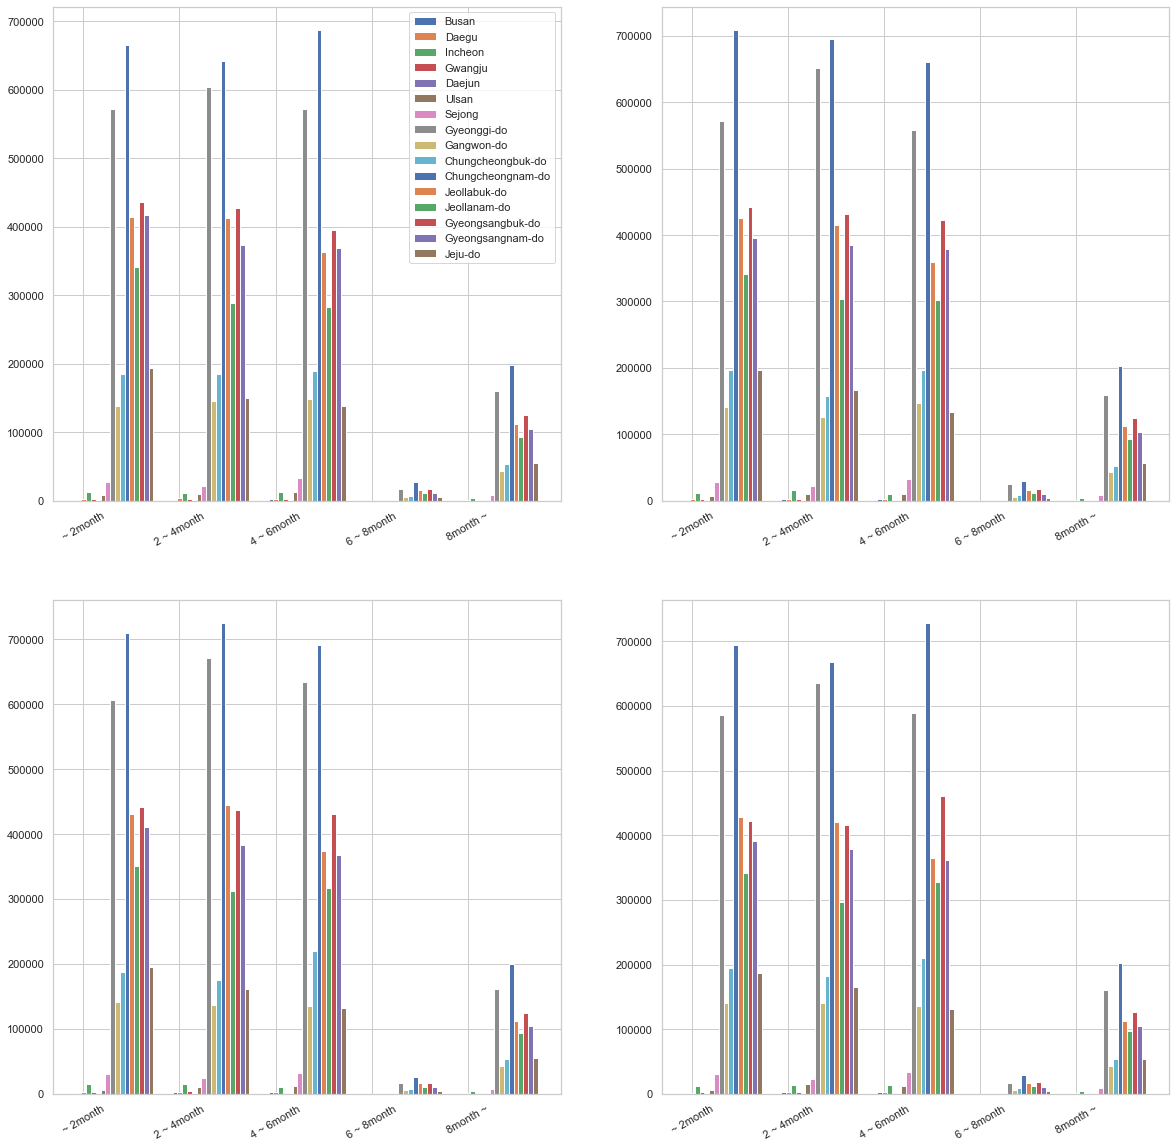

In [9]:
w1 = 0.05
x1 = np.arange(5) 

fig, ax = plt.subplots(figsize=(20, 20))

plt.subplot(2,2,1)
number_of_pig_2017_1st_1 = number_of_pig_2017_1st.set_index(['연령']).drop(['전국'], axis = 1).astype('int64')

plt.bar(x1, height = number_of_pig_2017_1st_1['부산광역시'], width = 0.05, label = 'Busan')
plt.bar(x1 + w1, height = number_of_pig_2017_1st_1['대구광역시'], width = 0.05, label = 'Daegu')
plt.bar(x1 + 2*w1, height = number_of_pig_2017_1st_1['인천광역시'], width = 0.05, label = 'Incheon')
plt.bar(x1 + 3*w1, height = number_of_pig_2017_1st_1['광주광역시'], width = 0.05, label = 'Gwangju')
plt.bar(x1 + 4*w1, height = number_of_pig_2017_1st_1['대전광역시'], width = 0.05, label = 'Daejun')
plt.bar(x1 + 5*w1, height = number_of_pig_2017_1st_1['울산광역시'], width = 0.05, label = 'Ulsan')
plt.bar(x1 + 6*w1, height = number_of_pig_2017_1st_1['세종특별자치시'], width = 0.05, label = 'Sejong')
plt.bar(x1 + 7*w1, height = number_of_pig_2017_1st_1['경기도'], width = 0.05, label = 'Gyeonggi-do')
plt.bar(x1 + 8*w1, height = number_of_pig_2017_1st_1['강원도'], width = 0.05, label = 'Gangwon-do')
plt.bar(x1 + 9*w1, height = number_of_pig_2017_1st_1['충청북도'], width = 0.05, label = 'Chungcheongbuk-do')
plt.bar(x1 + 10*w1, height = number_of_pig_2017_1st_1['충청남도'], width = 0.05, label = 'Chungcheongnam-do')
plt.bar(x1 + 11*w1, height = number_of_pig_2017_1st_1['전라북도'], width = 0.05, label = 'Jeollabuk-do')
plt.bar(x1 + 12*w1, height = number_of_pig_2017_1st_1['전라남도'], width = 0.05, label = 'Jeollanam-do')
plt.bar(x1 + 13*w1, height = number_of_pig_2017_1st_1['경상북도'], width = 0.05, label = 'Gyeongsangbuk-do')
plt.bar(x1 + 14*w1, height = number_of_pig_2017_1st_1['경상남도'], width = 0.05, label = 'Gyeongsangnam-do')
plt.bar(x1 + 15*w1, height = number_of_pig_2017_1st_1['제주도'], width = 0.05, label = 'Jeju-do')

plt.legend(loc = 'best')
plt.xticks(x1 + 15*w1 / 16, index, rotation = 30)
plt.grid(True)
##############################################################################################################
plt.subplot(2,2,2)
number_of_pig_2017_2nd_1 = number_of_pig_2017_2nd.set_index(['연령']).drop(['전국'], axis = 1).astype('int64')

plt.bar(x1, height = number_of_pig_2017_2nd_1['부산광역시'], width = 0.05, label = 'Busan')
plt.bar(x1 + w1, height = number_of_pig_2017_2nd_1['대구광역시'], width = 0.05, label = 'Daegu')
plt.bar(x1 + 2*w1, height = number_of_pig_2017_2nd_1['인천광역시'], width = 0.05, label = 'Incheon')
plt.bar(x1 + 3*w1, height = number_of_pig_2017_2nd_1['광주광역시'], width = 0.05, label = 'Gwangju')
plt.bar(x1 + 4*w1, height = number_of_pig_2017_2nd_1['대전광역시'], width = 0.05, label = 'Daejun')
plt.bar(x1 + 5*w1, height = number_of_pig_2017_2nd_1['울산광역시'], width = 0.05, label = 'Ulsan')
plt.bar(x1 + 6*w1, height = number_of_pig_2017_2nd_1['세종특별자치시'], width = 0.05, label = 'Sejong')
plt.bar(x1 + 7*w1, height = number_of_pig_2017_2nd_1['경기도'], width = 0.05, label = 'Gyeonggi-do')
plt.bar(x1 + 8*w1, height = number_of_pig_2017_2nd_1['강원도'], width = 0.05, label = 'Gangwon-do')
plt.bar(x1 + 9*w1, height = number_of_pig_2017_2nd_1['충청북도'], width = 0.05, label = 'Chungcheongbuk-do')
plt.bar(x1 + 10*w1, height = number_of_pig_2017_2nd_1['충청남도'], width = 0.05, label = 'Chungcheongnam-do')
plt.bar(x1 + 11*w1, height = number_of_pig_2017_2nd_1['전라북도'], width = 0.05, label = 'Jeollabuk-do')
plt.bar(x1 + 12*w1, height = number_of_pig_2017_2nd_1['전라남도'], width = 0.05, label = 'Jeollanam-do')
plt.bar(x1 + 13*w1, height = number_of_pig_2017_2nd_1['경상북도'], width = 0.05, label = 'Gyeongsangbuk-do')
plt.bar(x1 + 14*w1, height = number_of_pig_2017_2nd_1['경상남도'], width = 0.05, label = 'Gyeongsangnam-do')
plt.bar(x1 + 15*w1, height = number_of_pig_2017_2nd_1['제주도'], width = 0.05, label = 'Jeju-do')

# plt.legend(loc = 'best')
plt.xticks(x1 + 15*w1 / 16, index, rotation = 30)
plt.grid(True)
################################################################################################################
plt.subplot(2,2,3)
number_of_pig_2017_3rd_1 = number_of_pig_2017_3rd.set_index(['연령']).drop(['전국'], axis = 1).astype('int64')

plt.bar(x1, height = number_of_pig_2017_3rd_1['부산광역시'], width = 0.05, label = 'Busan')
plt.bar(x1 + w1, height = number_of_pig_2017_3rd_1['대구광역시'], width = 0.05, label = 'Daegu')
plt.bar(x1 + 2*w1, height = number_of_pig_2017_3rd_1['인천광역시'], width = 0.05, label = 'Incheon')
plt.bar(x1 + 3*w1, height = number_of_pig_2017_3rd_1['광주광역시'], width = 0.05, label = 'Gwangju')
plt.bar(x1 + 4*w1, height = number_of_pig_2017_3rd_1['대전광역시'], width = 0.05, label = 'Daejun')
plt.bar(x1 + 5*w1, height = number_of_pig_2017_3rd_1['울산광역시'], width = 0.05, label = 'Ulsan')
plt.bar(x1 + 6*w1, height = number_of_pig_2017_3rd_1['세종특별자치시'], width = 0.05, label = 'Sejong')
plt.bar(x1 + 7*w1, height = number_of_pig_2017_3rd_1['경기도'], width = 0.05, label = 'Gyeonggi-do')
plt.bar(x1 + 8*w1, height = number_of_pig_2017_3rd_1['강원도'], width = 0.05, label = 'Gangwon-do')
plt.bar(x1 + 9*w1, height = number_of_pig_2017_3rd_1['충청북도'], width = 0.05, label = 'Chungcheongbuk-do')
plt.bar(x1 + 10*w1, height = number_of_pig_2017_3rd_1['충청남도'], width = 0.05, label = 'Chungcheongnam-do')
plt.bar(x1 + 11*w1, height = number_of_pig_2017_3rd_1['전라북도'], width = 0.05, label = 'Jeollabuk-do')
plt.bar(x1 + 12*w1, height = number_of_pig_2017_3rd_1['전라남도'], width = 0.05, label = 'Jeollanam-do')
plt.bar(x1 + 13*w1, height = number_of_pig_2017_3rd_1['경상북도'], width = 0.05, label = 'Gyeongsangbuk-do')
plt.bar(x1 + 14*w1, height = number_of_pig_2017_3rd_1['경상남도'], width = 0.05, label = 'Gyeongsangnam-do')
plt.bar(x1 + 15*w1, height = number_of_pig_2017_3rd_1['제주도'], width = 0.05, label = 'Jeju-do')

# plt.legend(loc = 'best')
plt.xticks(x1 + 15*w1 / 16, index, rotation = 30)
plt.grid(True)
#############################################################################################################
plt.subplot(2,2,4)
number_of_pig_2017_4th_1 = number_of_pig_2017_4th.set_index(['연령']).drop(['전국'], axis = 1).astype('int64')

plt.bar(x1, height = number_of_pig_2017_4th_1['부산광역시'], width = 0.05, label = 'Busan')
plt.bar(x1 + w1, height = number_of_pig_2017_4th_1['대구광역시'], width = 0.05, label = 'Daegu')
plt.bar(x1 + 2*w1, height = number_of_pig_2017_4th_1['인천광역시'], width = 0.05, label = 'Incheon')
plt.bar(x1 + 3*w1, height = number_of_pig_2017_4th_1['광주광역시'], width = 0.05, label = 'Gwangju')
plt.bar(x1 + 4*w1, height = number_of_pig_2017_4th_1['대전광역시'], width = 0.05, label = 'Daejun')
plt.bar(x1 + 5*w1, height = number_of_pig_2017_4th_1['울산광역시'], width = 0.05, label = 'Ulsan')
plt.bar(x1 + 6*w1, height = number_of_pig_2017_4th_1['세종특별자치시'], width = 0.05, label = 'Sejong')
plt.bar(x1 + 7*w1, height = number_of_pig_2017_4th_1['경기도'], width = 0.05, label = 'Gyeonggi-do')
plt.bar(x1 + 8*w1, height = number_of_pig_2017_4th_1['강원도'], width = 0.05, label = 'Gangwon-do')
plt.bar(x1 + 9*w1, height = number_of_pig_2017_4th_1['충청북도'], width = 0.05, label = 'Chungcheongbuk-do')
plt.bar(x1 + 10*w1, height = number_of_pig_2017_4th_1['충청남도'], width = 0.05, label = 'Chungcheongnam-do')
plt.bar(x1 + 11*w1, height = number_of_pig_2017_4th_1['전라북도'], width = 0.05, label = 'Jeollabuk-do')
plt.bar(x1 + 12*w1, height = number_of_pig_2017_4th_1['전라남도'], width = 0.05, label = 'Jeollanam-do')
plt.bar(x1 + 13*w1, height = number_of_pig_2017_4th_1['경상북도'], width = 0.05, label = 'Gyeongsangbuk-do')
plt.bar(x1 + 14*w1, height = number_of_pig_2017_4th_1['경상남도'], width = 0.05, label = 'Gyeongsangnam-do')
plt.bar(x1 + 15*w1, height = number_of_pig_2017_4th_1['제주도'], width = 0.05, label = 'Jeju-do')

# plt.legend(loc = 'best')
plt.xticks(x1 + 15*w1 / 16, index, rotation = 30)
plt.grid(True)

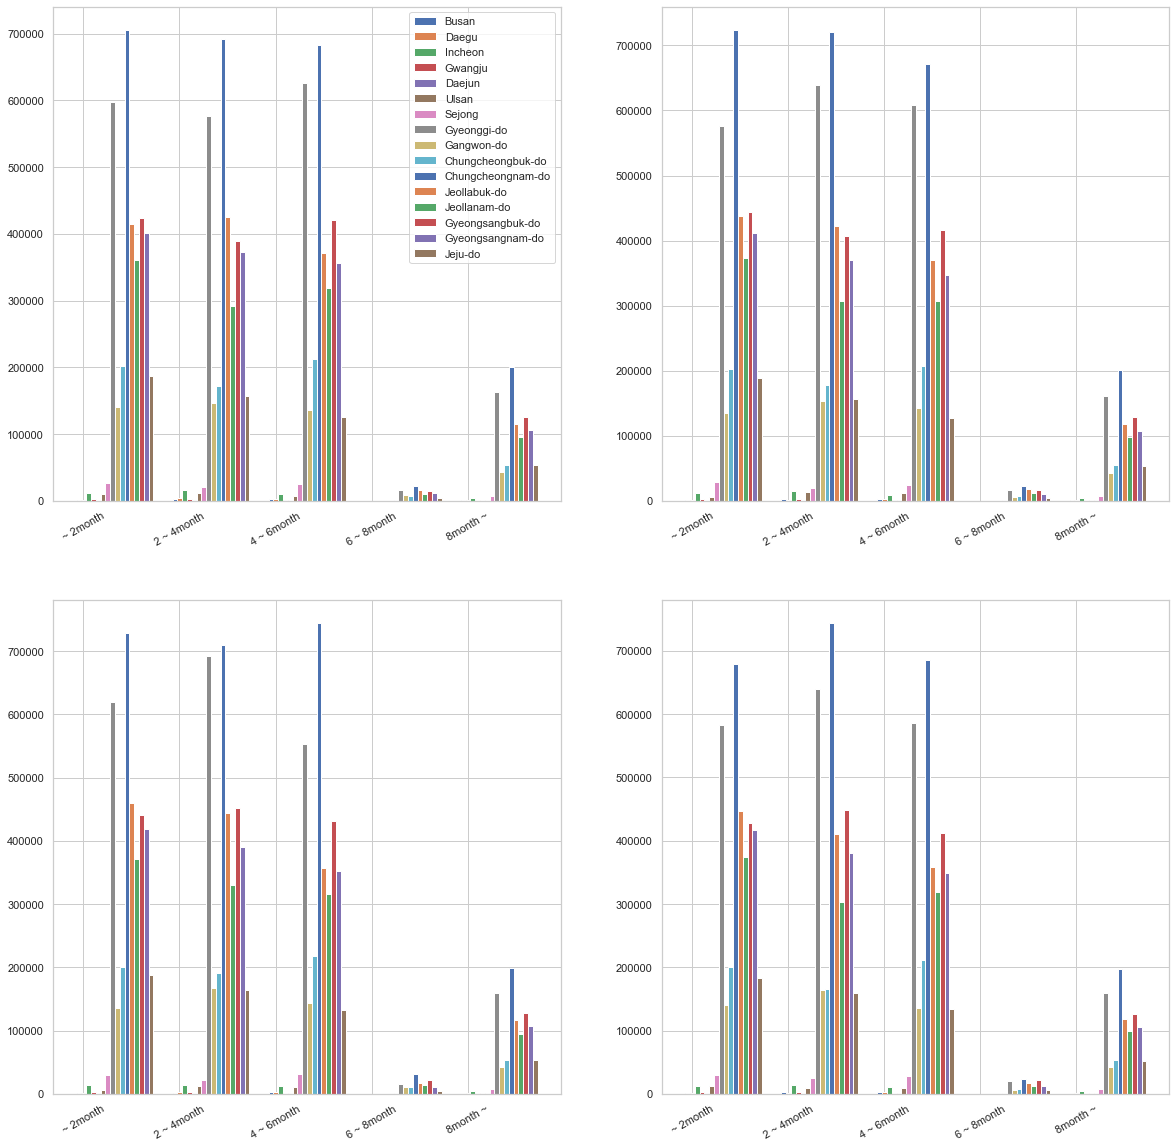

In [10]:
fig, ax = plt.subplots(figsize=(20, 20))

plt.subplot(2,2,1)
number_of_pig_2018_1st_1 = number_of_pig_2018_1st.set_index(['연령']).drop(['전국'], axis = 1).astype('int64')

plt.bar(x1, height = number_of_pig_2018_1st_1['부산광역시'], width = 0.05, label = 'Busan')
plt.bar(x1 + w1, height = number_of_pig_2018_1st_1['대구광역시'], width = 0.05, label = 'Daegu')
plt.bar(x1 + 2*w1, height = number_of_pig_2018_1st_1['인천광역시'], width = 0.05, label = 'Incheon')
plt.bar(x1 + 3*w1, height = number_of_pig_2018_1st_1['광주광역시'], width = 0.05, label = 'Gwangju')
plt.bar(x1 + 4*w1, height = number_of_pig_2018_1st_1['대전광역시'], width = 0.05, label = 'Daejun')
plt.bar(x1 + 5*w1, height = number_of_pig_2018_1st_1['울산광역시'], width = 0.05, label = 'Ulsan')
plt.bar(x1 + 6*w1, height = number_of_pig_2018_1st_1['세종특별자치시'], width = 0.05, label = 'Sejong')
plt.bar(x1 + 7*w1, height = number_of_pig_2018_1st_1['경기도'], width = 0.05, label = 'Gyeonggi-do')
plt.bar(x1 + 8*w1, height = number_of_pig_2018_1st_1['강원도'], width = 0.05, label = 'Gangwon-do')
plt.bar(x1 + 9*w1, height = number_of_pig_2018_1st_1['충청북도'], width = 0.05, label = 'Chungcheongbuk-do')
plt.bar(x1 + 10*w1, height = number_of_pig_2018_1st_1['충청남도'], width = 0.05, label = 'Chungcheongnam-do')
plt.bar(x1 + 11*w1, height = number_of_pig_2018_1st_1['전라북도'], width = 0.05, label = 'Jeollabuk-do')
plt.bar(x1 + 12*w1, height = number_of_pig_2018_1st_1['전라남도'], width = 0.05, label = 'Jeollanam-do')
plt.bar(x1 + 13*w1, height = number_of_pig_2018_1st_1['경상북도'], width = 0.05, label = 'Gyeongsangbuk-do')
plt.bar(x1 + 14*w1, height = number_of_pig_2018_1st_1['경상남도'], width = 0.05, label = 'Gyeongsangnam-do')
plt.bar(x1 + 15*w1, height = number_of_pig_2018_1st_1['제주도'], width = 0.05, label = 'Jeju-do')

plt.legend(loc = 'best')
plt.xticks(x1 + 15*w1 / 16, index, rotation = 30)
plt.grid(True)
##############################################################################################################
plt.subplot(2,2,2)
number_of_pig_2018_2nd_1 = number_of_pig_2018_2nd.set_index(['연령']).drop(['전국'], axis = 1).astype('int64')

plt.bar(x1, height = number_of_pig_2018_2nd_1['부산광역시'], width = 0.05, label = 'Busan')
plt.bar(x1 + w1, height = number_of_pig_2018_2nd_1['대구광역시'], width = 0.05, label = 'Daegu')
plt.bar(x1 + 2*w1, height = number_of_pig_2018_2nd_1['인천광역시'], width = 0.05, label = 'Incheon')
plt.bar(x1 + 3*w1, height = number_of_pig_2018_2nd_1['광주광역시'], width = 0.05, label = 'Gwangju')
plt.bar(x1 + 4*w1, height = number_of_pig_2018_2nd_1['대전광역시'], width = 0.05, label = 'Daejun')
plt.bar(x1 + 5*w1, height = number_of_pig_2018_2nd_1['울산광역시'], width = 0.05, label = 'Ulsan')
plt.bar(x1 + 6*w1, height = number_of_pig_2018_2nd_1['세종특별자치시'], width = 0.05, label = 'Sejong')
plt.bar(x1 + 7*w1, height = number_of_pig_2018_2nd_1['경기도'], width = 0.05, label = 'Gyeonggi-do')
plt.bar(x1 + 8*w1, height = number_of_pig_2018_2nd_1['강원도'], width = 0.05, label = 'Gangwon-do')
plt.bar(x1 + 9*w1, height = number_of_pig_2018_2nd_1['충청북도'], width = 0.05, label = 'Chungcheongbuk-do')
plt.bar(x1 + 10*w1, height = number_of_pig_2018_2nd_1['충청남도'], width = 0.05, label = 'Chungcheongnam-do')
plt.bar(x1 + 11*w1, height = number_of_pig_2018_2nd_1['전라북도'], width = 0.05, label = 'Jeollabuk-do')
plt.bar(x1 + 12*w1, height = number_of_pig_2018_2nd_1['전라남도'], width = 0.05, label = 'Jeollanam-do')
plt.bar(x1 + 13*w1, height = number_of_pig_2018_2nd_1['경상북도'], width = 0.05, label = 'Gyeongsangbuk-do')
plt.bar(x1 + 14*w1, height = number_of_pig_2018_2nd_1['경상남도'], width = 0.05, label = 'Gyeongsangnam-do')
plt.bar(x1 + 15*w1, height = number_of_pig_2018_2nd_1['제주도'], width = 0.05, label = 'Jeju-do')

# plt.legend(loc = 'best')
plt.xticks(x1 + 15*w1 / 16, index, rotation = 30)
plt.grid(True)
################################################################################################################
plt.subplot(2,2,3)
number_of_pig_2018_3rd_1 = number_of_pig_2018_3rd.set_index(['연령']).drop(['전국'], axis = 1).astype('int64')

plt.bar(x1, height = number_of_pig_2018_3rd_1['부산광역시'], width = 0.05, label = 'Busan')
plt.bar(x1 + w1, height = number_of_pig_2018_3rd_1['대구광역시'], width = 0.05, label = 'Daegu')
plt.bar(x1 + 2*w1, height = number_of_pig_2018_3rd_1['인천광역시'], width = 0.05, label = 'Incheon')
plt.bar(x1 + 3*w1, height = number_of_pig_2018_3rd_1['광주광역시'], width = 0.05, label = 'Gwangju')
plt.bar(x1 + 4*w1, height = number_of_pig_2018_3rd_1['대전광역시'], width = 0.05, label = 'Daejun')
plt.bar(x1 + 5*w1, height = number_of_pig_2018_3rd_1['울산광역시'], width = 0.05, label = 'Ulsan')
plt.bar(x1 + 6*w1, height = number_of_pig_2018_3rd_1['세종특별자치시'], width = 0.05, label = 'Sejong')
plt.bar(x1 + 7*w1, height = number_of_pig_2018_3rd_1['경기도'], width = 0.05, label = 'Gyeonggi-do')
plt.bar(x1 + 8*w1, height = number_of_pig_2018_3rd_1['강원도'], width = 0.05, label = 'Gangwon-do')
plt.bar(x1 + 9*w1, height = number_of_pig_2018_3rd_1['충청북도'], width = 0.05, label = 'Chungcheongbuk-do')
plt.bar(x1 + 10*w1, height = number_of_pig_2018_3rd_1['충청남도'], width = 0.05, label = 'Chungcheongnam-do')
plt.bar(x1 + 11*w1, height = number_of_pig_2018_3rd_1['전라북도'], width = 0.05, label = 'Jeollabuk-do')
plt.bar(x1 + 12*w1, height = number_of_pig_2018_3rd_1['전라남도'], width = 0.05, label = 'Jeollanam-do')
plt.bar(x1 + 13*w1, height = number_of_pig_2018_3rd_1['경상북도'], width = 0.05, label = 'Gyeongsangbuk-do')
plt.bar(x1 + 14*w1, height = number_of_pig_2018_3rd_1['경상남도'], width = 0.05, label = 'Gyeongsangnam-do')
plt.bar(x1 + 15*w1, height = number_of_pig_2018_3rd_1['제주도'], width = 0.05, label = 'Jeju-do')

# plt.legend(loc = 'best')
plt.xticks(x1 + 15*w1 / 16, index, rotation = 30)
plt.grid(True)
#############################################################################################################
plt.subplot(2,2,4)
number_of_pig_2018_4th_1 = number_of_pig_2018_4th.set_index(['연령']).drop(['전국'], axis = 1).astype('int64')

plt.bar(x1, height = number_of_pig_2018_4th_1['부산광역시'], width = 0.05, label = 'Busan')
plt.bar(x1 + w1, height = number_of_pig_2018_4th_1['대구광역시'], width = 0.05, label = 'Daegu')
plt.bar(x1 + 2*w1, height = number_of_pig_2018_4th_1['인천광역시'], width = 0.05, label = 'Incheon')
plt.bar(x1 + 3*w1, height = number_of_pig_2018_4th_1['광주광역시'], width = 0.05, label = 'Gwangju')
plt.bar(x1 + 4*w1, height = number_of_pig_2018_4th_1['대전광역시'], width = 0.05, label = 'Daejun')
plt.bar(x1 + 5*w1, height = number_of_pig_2018_4th_1['울산광역시'], width = 0.05, label = 'Ulsan')
plt.bar(x1 + 6*w1, height = number_of_pig_2018_4th_1['세종특별자치시'], width = 0.05, label = 'Sejong')
plt.bar(x1 + 7*w1, height = number_of_pig_2018_4th_1['경기도'], width = 0.05, label = 'Gyeonggi-do')
plt.bar(x1 + 8*w1, height = number_of_pig_2018_4th_1['강원도'], width = 0.05, label = 'Gangwon-do')
plt.bar(x1 + 9*w1, height = number_of_pig_2018_4th_1['충청북도'], width = 0.05, label = 'Chungcheongbuk-do')
plt.bar(x1 + 10*w1, height = number_of_pig_2018_4th_1['충청남도'], width = 0.05, label = 'Chungcheongnam-do')
plt.bar(x1 + 11*w1, height = number_of_pig_2018_4th_1['전라북도'], width = 0.05, label = 'Jeollabuk-do')
plt.bar(x1 + 12*w1, height = number_of_pig_2018_4th_1['전라남도'], width = 0.05, label = 'Jeollanam-do')
plt.bar(x1 + 13*w1, height = number_of_pig_2018_4th_1['경상북도'], width = 0.05, label = 'Gyeongsangbuk-do')
plt.bar(x1 + 14*w1, height = number_of_pig_2018_4th_1['경상남도'], width = 0.05, label = 'Gyeongsangnam-do')
plt.bar(x1 + 15*w1, height = number_of_pig_2018_4th_1['제주도'], width = 0.05, label = 'Jeju-do')

# plt.legend(loc = 'best')
plt.xticks(x1 + 15*w1 / 16, index, rotation = 30)
plt.grid(True)

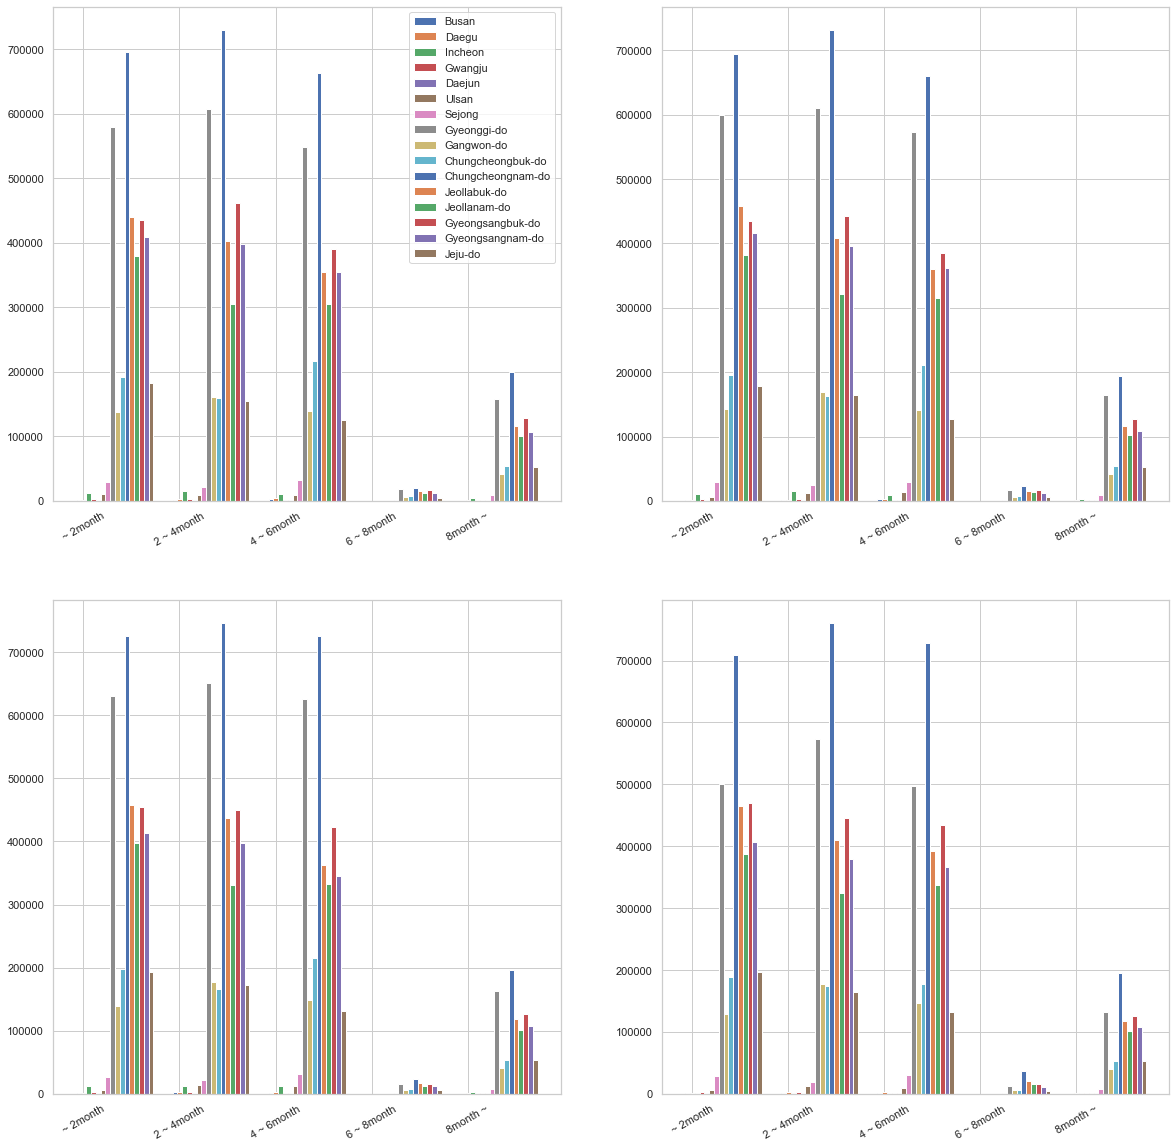

In [16]:
fig, ax = plt.subplots(figsize=(20, 20))

plt.subplot(2,2,1)
number_of_pig_2019_1st_1 = number_of_pig_2019_1st.set_index(['연령']).drop(['전국'], axis = 1).astype('int64')

plt.bar(x1, height = number_of_pig_2019_1st_1['부산광역시'], width = 0.05, label = 'Busan')
plt.bar(x1 + w1, height = number_of_pig_2019_1st_1['대구광역시'], width = 0.05, label = 'Daegu')
plt.bar(x1 + 2*w1, height = number_of_pig_2019_1st_1['인천광역시'], width = 0.05, label = 'Incheon')
plt.bar(x1 + 3*w1, height = number_of_pig_2019_1st_1['광주광역시'], width = 0.05, label = 'Gwangju')
plt.bar(x1 + 4*w1, height = number_of_pig_2019_1st_1['대전광역시'], width = 0.05, label = 'Daejun')
plt.bar(x1 + 5*w1, height = number_of_pig_2019_1st_1['울산광역시'], width = 0.05, label = 'Ulsan')
plt.bar(x1 + 6*w1, height = number_of_pig_2019_1st_1['세종특별자치시'], width = 0.05, label = 'Sejong')
plt.bar(x1 + 7*w1, height = number_of_pig_2019_1st_1['경기도'], width = 0.05, label = 'Gyeonggi-do')
plt.bar(x1 + 8*w1, height = number_of_pig_2019_1st_1['강원도'], width = 0.05, label = 'Gangwon-do')
plt.bar(x1 + 9*w1, height = number_of_pig_2019_1st_1['충청북도'], width = 0.05, label = 'Chungcheongbuk-do')
plt.bar(x1 + 10*w1, height = number_of_pig_2019_1st_1['충청남도'], width = 0.05, label = 'Chungcheongnam-do')
plt.bar(x1 + 11*w1, height = number_of_pig_2019_1st_1['전라북도'], width = 0.05, label = 'Jeollabuk-do')
plt.bar(x1 + 12*w1, height = number_of_pig_2019_1st_1['전라남도'], width = 0.05, label = 'Jeollanam-do')
plt.bar(x1 + 13*w1, height = number_of_pig_2019_1st_1['경상북도'], width = 0.05, label = 'Gyeongsangbuk-do')
plt.bar(x1 + 14*w1, height = number_of_pig_2019_1st_1['경상남도'], width = 0.05, label = 'Gyeongsangnam-do')
plt.bar(x1 + 15*w1, height = number_of_pig_2019_1st_1['제주도'], width = 0.05, label = 'Jeju-do')

plt.legend(loc = 'best')
plt.xticks(x1 + 15*w1 / 16, index, rotation = 30)
plt.grid(True)
##############################################################################################################
plt.subplot(2,2,2)
number_of_pig_2019_2nd_1 = number_of_pig_2019_2nd.set_index(['연령']).drop(['전국'], axis = 1).astype('int64')

plt.bar(x1, height = number_of_pig_2019_2nd_1['부산광역시'], width = 0.05, label = 'Busan')
plt.bar(x1 + w1, height = number_of_pig_2019_2nd_1['대구광역시'], width = 0.05, label = 'Daegu')
plt.bar(x1 + 2*w1, height = number_of_pig_2019_2nd_1['인천광역시'], width = 0.05, label = 'Incheon')
plt.bar(x1 + 3*w1, height = number_of_pig_2019_2nd_1['광주광역시'], width = 0.05, label = 'Gwangju')
plt.bar(x1 + 4*w1, height = number_of_pig_2019_2nd_1['대전광역시'], width = 0.05, label = 'Daejun')
plt.bar(x1 + 5*w1, height = number_of_pig_2019_2nd_1['울산광역시'], width = 0.05, label = 'Ulsan')
plt.bar(x1 + 6*w1, height = number_of_pig_2019_2nd_1['세종특별자치시'], width = 0.05, label = 'Sejong')
plt.bar(x1 + 7*w1, height = number_of_pig_2019_2nd_1['경기도'], width = 0.05, label = 'Gyeonggi-do')
plt.bar(x1 + 8*w1, height = number_of_pig_2019_2nd_1['강원도'], width = 0.05, label = 'Gangwon-do')
plt.bar(x1 + 9*w1, height = number_of_pig_2019_2nd_1['충청북도'], width = 0.05, label = 'Chungcheongbuk-do')
plt.bar(x1 + 10*w1, height = number_of_pig_2019_2nd_1['충청남도'], width = 0.05, label = 'Chungcheongnam-do')
plt.bar(x1 + 11*w1, height = number_of_pig_2019_2nd_1['전라북도'], width = 0.05, label = 'Jeollabuk-do')
plt.bar(x1 + 12*w1, height = number_of_pig_2019_2nd_1['전라남도'], width = 0.05, label = 'Jeollanam-do')
plt.bar(x1 + 13*w1, height = number_of_pig_2019_2nd_1['경상북도'], width = 0.05, label = 'Gyeongsangbuk-do')
plt.bar(x1 + 14*w1, height = number_of_pig_2019_2nd_1['경상남도'], width = 0.05, label = 'Gyeongsangnam-do')
plt.bar(x1 + 15*w1, height = number_of_pig_2019_2nd_1['제주도'], width = 0.05, label = 'Jeju-do')

# plt.legend(loc = 'best')
plt.xticks(x1 + 15*w1 / 16, index, rotation = 30)
plt.grid(True)
################################################################################################################
plt.subplot(2,2,3)
number_of_pig_2019_3rd_1 = number_of_pig_2019_3rd.set_index(['연령']).drop(['전국'], axis = 1).astype('int64')

plt.bar(x1, height = number_of_pig_2019_3rd_1['부산광역시'], width = 0.05, label = 'Busan')
plt.bar(x1 + w1, height = number_of_pig_2019_3rd_1['대구광역시'], width = 0.05, label = 'Daegu')
plt.bar(x1 + 2*w1, height = number_of_pig_2019_3rd_1['인천광역시'], width = 0.05, label = 'Incheon')
plt.bar(x1 + 3*w1, height = number_of_pig_2019_3rd_1['광주광역시'], width = 0.05, label = 'Gwangju')
plt.bar(x1 + 4*w1, height = number_of_pig_2019_3rd_1['대전광역시'], width = 0.05, label = 'Daejun')
plt.bar(x1 + 5*w1, height = number_of_pig_2019_3rd_1['울산광역시'], width = 0.05, label = 'Ulsan')
plt.bar(x1 + 6*w1, height = number_of_pig_2019_3rd_1['세종특별자치시'], width = 0.05, label = 'Sejong')
plt.bar(x1 + 7*w1, height = number_of_pig_2019_3rd_1['경기도'], width = 0.05, label = 'Gyeonggi-do')
plt.bar(x1 + 8*w1, height = number_of_pig_2019_3rd_1['강원도'], width = 0.05, label = 'Gangwon-do')
plt.bar(x1 + 9*w1, height = number_of_pig_2019_3rd_1['충청북도'], width = 0.05, label = 'Chungcheongbuk-do')
plt.bar(x1 + 10*w1, height = number_of_pig_2019_3rd_1['충청남도'], width = 0.05, label = 'Chungcheongnam-do')
plt.bar(x1 + 11*w1, height = number_of_pig_2019_3rd_1['전라북도'], width = 0.05, label = 'Jeollabuk-do')
plt.bar(x1 + 12*w1, height = number_of_pig_2019_3rd_1['전라남도'], width = 0.05, label = 'Jeollanam-do')
plt.bar(x1 + 13*w1, height = number_of_pig_2019_3rd_1['경상북도'], width = 0.05, label = 'Gyeongsangbuk-do')
plt.bar(x1 + 14*w1, height = number_of_pig_2019_3rd_1['경상남도'], width = 0.05, label = 'Gyeongsangnam-do')
plt.bar(x1 + 15*w1, height = number_of_pig_2019_3rd_1['제주도'], width = 0.05, label = 'Jeju-do')

# plt.legend(loc = 'best')
plt.xticks(x1 + 15*w1 / 16, index, rotation = 30)
plt.grid(True)
#############################################################################################################
plt.subplot(2,2,4)
number_of_pig_2019_4th_1 = number_of_pig_2019_4th.set_index(['연령']).drop(['전국'], axis = 1).astype('int64')

plt.bar(x1, height = number_of_pig_2019_4th_1['부산광역시'], width = 0.05, label = 'Busan')
plt.bar(x1 + w1, height = number_of_pig_2019_4th_1['대구광역시'], width = 0.05, label = 'Daegu')
plt.bar(x1 + 2*w1, height = number_of_pig_2019_4th_1['인천광역시'], width = 0.05, label = 'Incheon')
plt.bar(x1 + 3*w1, height = number_of_pig_2019_4th_1['광주광역시'], width = 0.05, label = 'Gwangju')
plt.bar(x1 + 4*w1, height = number_of_pig_2019_4th_1['대전광역시'], width = 0.05, label = 'Daejun')
plt.bar(x1 + 5*w1, height = number_of_pig_2019_4th_1['울산광역시'], width = 0.05, label = 'Ulsan')
plt.bar(x1 + 6*w1, height = number_of_pig_2019_4th_1['세종특별자치시'], width = 0.05, label = 'Sejong')
plt.bar(x1 + 7*w1, height = number_of_pig_2019_4th_1['경기도'], width = 0.05, label = 'Gyeonggi-do')
plt.bar(x1 + 8*w1, height = number_of_pig_2019_4th_1['강원도'], width = 0.05, label = 'Gangwon-do')
plt.bar(x1 + 9*w1, height = number_of_pig_2019_4th_1['충청북도'], width = 0.05, label = 'Chungcheongbuk-do')
plt.bar(x1 + 10*w1, height = number_of_pig_2019_4th_1['충청남도'], width = 0.05, label = 'Chungcheongnam-do')
plt.bar(x1 + 11*w1, height = number_of_pig_2019_4th_1['전라북도'], width = 0.05, label = 'Jeollabuk-do')
plt.bar(x1 + 12*w1, height = number_of_pig_2019_4th_1['전라남도'], width = 0.05, label = 'Jeollanam-do')
plt.bar(x1 + 13*w1, height = number_of_pig_2019_4th_1['경상북도'], width = 0.05, label = 'Gyeongsangbuk-do')
plt.bar(x1 + 14*w1, height = number_of_pig_2019_4th_1['경상남도'], width = 0.05, label = 'Gyeongsangnam-do')
plt.bar(x1 + 15*w1, height = number_of_pig_2019_4th_1['제주도'], width = 0.05, label = 'Jeju-do')

# plt.legend(loc = 'best')
plt.xticks(x1 + 15*w1 / 16, index, rotation = 30)
plt.grid(True)

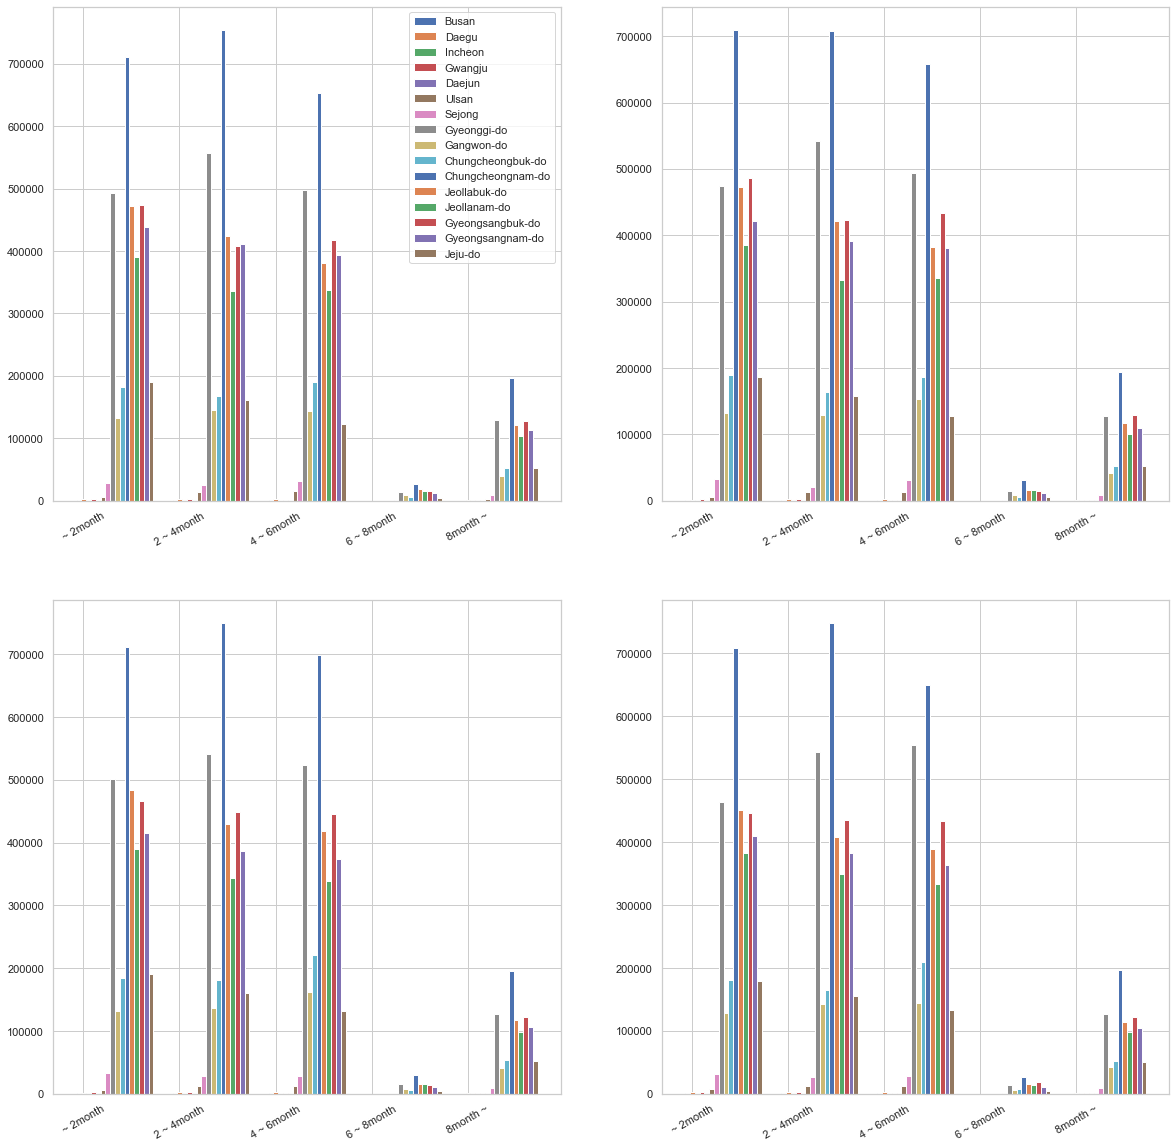

In [12]:
fig, ax = plt.subplots(figsize=(20, 20))

plt.subplot(2,2,1)
number_of_pig_2020_1st_1 = number_of_pig_2020_1st.set_index(['연령']).drop(['전국'], axis = 1).astype('int64')

plt.bar(x1, height = number_of_pig_2020_1st_1['부산광역시'], width = 0.05, label = 'Busan')
plt.bar(x1 + w1, height = number_of_pig_2020_1st_1['대구광역시'], width = 0.05, label = 'Daegu')
plt.bar(x1 + 2*w1, height = number_of_pig_2020_1st_1['인천광역시'], width = 0.05, label = 'Incheon')
plt.bar(x1 + 3*w1, height = number_of_pig_2020_1st_1['광주광역시'], width = 0.05, label = 'Gwangju')
plt.bar(x1 + 4*w1, height = number_of_pig_2020_1st_1['대전광역시'], width = 0.05, label = 'Daejun')
plt.bar(x1 + 5*w1, height = number_of_pig_2020_1st_1['울산광역시'], width = 0.05, label = 'Ulsan')
plt.bar(x1 + 6*w1, height = number_of_pig_2020_1st_1['세종특별자치시'], width = 0.05, label = 'Sejong')
plt.bar(x1 + 7*w1, height = number_of_pig_2020_1st_1['경기도'], width = 0.05, label = 'Gyeonggi-do')
plt.bar(x1 + 8*w1, height = number_of_pig_2020_1st_1['강원도'], width = 0.05, label = 'Gangwon-do')
plt.bar(x1 + 9*w1, height = number_of_pig_2020_1st_1['충청북도'], width = 0.05, label = 'Chungcheongbuk-do')
plt.bar(x1 + 10*w1, height = number_of_pig_2020_1st_1['충청남도'], width = 0.05, label = 'Chungcheongnam-do')
plt.bar(x1 + 11*w1, height = number_of_pig_2020_1st_1['전라북도'], width = 0.05, label = 'Jeollabuk-do')
plt.bar(x1 + 12*w1, height = number_of_pig_2020_1st_1['전라남도'], width = 0.05, label = 'Jeollanam-do')
plt.bar(x1 + 13*w1, height = number_of_pig_2020_1st_1['경상북도'], width = 0.05, label = 'Gyeongsangbuk-do')
plt.bar(x1 + 14*w1, height = number_of_pig_2020_1st_1['경상남도'], width = 0.05, label = 'Gyeongsangnam-do')
plt.bar(x1 + 15*w1, height = number_of_pig_2020_1st_1['제주도'], width = 0.05, label = 'Jeju-do')

plt.legend(loc = 'best')
plt.xticks(x1 + 15*w1 / 16, index, rotation = 30)
plt.grid(True)
##############################################################################################################
plt.subplot(2,2,2)
number_of_pig_2020_2nd_1 = number_of_pig_2020_2nd.set_index(['연령']).drop(['전국'], axis = 1).astype('int64')

plt.bar(x1, height = number_of_pig_2020_2nd_1['부산광역시'], width = 0.05, label = 'Busan')
plt.bar(x1 + w1, height = number_of_pig_2020_2nd_1['대구광역시'], width = 0.05, label = 'Daegu')
plt.bar(x1 + 2*w1, height = number_of_pig_2020_2nd_1['인천광역시'], width = 0.05, label = 'Incheon')
plt.bar(x1 + 3*w1, height = number_of_pig_2020_2nd_1['광주광역시'], width = 0.05, label = 'Gwangju')
plt.bar(x1 + 4*w1, height = number_of_pig_2020_2nd_1['대전광역시'], width = 0.05, label = 'Daejun')
plt.bar(x1 + 5*w1, height = number_of_pig_2020_2nd_1['울산광역시'], width = 0.05, label = 'Ulsan')
plt.bar(x1 + 6*w1, height = number_of_pig_2020_2nd_1['세종특별자치시'], width = 0.05, label = 'Sejong')
plt.bar(x1 + 7*w1, height = number_of_pig_2020_2nd_1['경기도'], width = 0.05, label = 'Gyeonggi-do')
plt.bar(x1 + 8*w1, height = number_of_pig_2020_2nd_1['강원도'], width = 0.05, label = 'Gangwon-do')
plt.bar(x1 + 9*w1, height = number_of_pig_2020_2nd_1['충청북도'], width = 0.05, label = 'Chungcheongbuk-do')
plt.bar(x1 + 10*w1, height = number_of_pig_2020_2nd_1['충청남도'], width = 0.05, label = 'Chungcheongnam-do')
plt.bar(x1 + 11*w1, height = number_of_pig_2020_2nd_1['전라북도'], width = 0.05, label = 'Jeollabuk-do')
plt.bar(x1 + 12*w1, height = number_of_pig_2020_2nd_1['전라남도'], width = 0.05, label = 'Jeollanam-do')
plt.bar(x1 + 13*w1, height = number_of_pig_2020_2nd_1['경상북도'], width = 0.05, label = 'Gyeongsangbuk-do')
plt.bar(x1 + 14*w1, height = number_of_pig_2020_2nd_1['경상남도'], width = 0.05, label = 'Gyeongsangnam-do')
plt.bar(x1 + 15*w1, height = number_of_pig_2020_2nd_1['제주도'], width = 0.05, label = 'Jeju-do')

# plt.legend(loc = 'best')
plt.xticks(x1 + 15*w1 / 16, index, rotation = 30)
plt.grid(True)
################################################################################################################
plt.subplot(2,2,3)
number_of_pig_2020_3rd_1 = number_of_pig_2020_3rd.set_index(['연령']).drop(['전국'], axis = 1).astype('int64')

plt.bar(x1, height = number_of_pig_2020_3rd_1['부산광역시'], width = 0.05, label = 'Busan')
plt.bar(x1 + w1, height = number_of_pig_2020_3rd_1['대구광역시'], width = 0.05, label = 'Daegu')
plt.bar(x1 + 2*w1, height = number_of_pig_2020_3rd_1['인천광역시'], width = 0.05, label = 'Incheon')
plt.bar(x1 + 3*w1, height = number_of_pig_2020_3rd_1['광주광역시'], width = 0.05, label = 'Gwangju')
plt.bar(x1 + 4*w1, height = number_of_pig_2020_3rd_1['대전광역시'], width = 0.05, label = 'Daejun')
plt.bar(x1 + 5*w1, height = number_of_pig_2020_3rd_1['울산광역시'], width = 0.05, label = 'Ulsan')
plt.bar(x1 + 6*w1, height = number_of_pig_2020_3rd_1['세종특별자치시'], width = 0.05, label = 'Sejong')
plt.bar(x1 + 7*w1, height = number_of_pig_2020_3rd_1['경기도'], width = 0.05, label = 'Gyeonggi-do')
plt.bar(x1 + 8*w1, height = number_of_pig_2020_3rd_1['강원도'], width = 0.05, label = 'Gangwon-do')
plt.bar(x1 + 9*w1, height = number_of_pig_2020_3rd_1['충청북도'], width = 0.05, label = 'Chungcheongbuk-do')
plt.bar(x1 + 10*w1, height = number_of_pig_2020_3rd_1['충청남도'], width = 0.05, label = 'Chungcheongnam-do')
plt.bar(x1 + 11*w1, height = number_of_pig_2020_3rd_1['전라북도'], width = 0.05, label = 'Jeollabuk-do')
plt.bar(x1 + 12*w1, height = number_of_pig_2020_3rd_1['전라남도'], width = 0.05, label = 'Jeollanam-do')
plt.bar(x1 + 13*w1, height = number_of_pig_2020_3rd_1['경상북도'], width = 0.05, label = 'Gyeongsangbuk-do')
plt.bar(x1 + 14*w1, height = number_of_pig_2020_3rd_1['경상남도'], width = 0.05, label = 'Gyeongsangnam-do')
plt.bar(x1 + 15*w1, height = number_of_pig_2020_3rd_1['제주도'], width = 0.05, label = 'Jeju-do')

# plt.legend(loc = 'best')
plt.xticks(x1 + 15*w1 / 16, index, rotation = 30)
plt.grid(True)
#############################################################################################################
plt.subplot(2,2,4)
number_of_pig_2020_4th_1 = number_of_pig_2020_4th.set_index(['연령']).drop(['전국'], axis = 1).astype('int64')

plt.bar(x1, height = number_of_pig_2020_4th_1['부산광역시'], width = 0.05, label = 'Busan')
plt.bar(x1 + w1, height = number_of_pig_2020_4th_1['대구광역시'], width = 0.05, label = 'Daegu')
plt.bar(x1 + 2*w1, height = number_of_pig_2020_4th_1['인천광역시'], width = 0.05, label = 'Incheon')
plt.bar(x1 + 3*w1, height = number_of_pig_2020_4th_1['광주광역시'], width = 0.05, label = 'Gwangju')
plt.bar(x1 + 4*w1, height = number_of_pig_2020_4th_1['대전광역시'], width = 0.05, label = 'Daejun')
plt.bar(x1 + 5*w1, height = number_of_pig_2020_4th_1['울산광역시'], width = 0.05, label = 'Ulsan')
plt.bar(x1 + 6*w1, height = number_of_pig_2020_4th_1['세종특별자치시'], width = 0.05, label = 'Sejong')
plt.bar(x1 + 7*w1, height = number_of_pig_2020_4th_1['경기도'], width = 0.05, label = 'Gyeonggi-do')
plt.bar(x1 + 8*w1, height = number_of_pig_2020_4th_1['강원도'], width = 0.05, label = 'Gangwon-do')
plt.bar(x1 + 9*w1, height = number_of_pig_2020_4th_1['충청북도'], width = 0.05, label = 'Chungcheongbuk-do')
plt.bar(x1 + 10*w1, height = number_of_pig_2020_4th_1['충청남도'], width = 0.05, label = 'Chungcheongnam-do')
plt.bar(x1 + 11*w1, height = number_of_pig_2020_4th_1['전라북도'], width = 0.05, label = 'Jeollabuk-do')
plt.bar(x1 + 12*w1, height = number_of_pig_2020_4th_1['전라남도'], width = 0.05, label = 'Jeollanam-do')
plt.bar(x1 + 13*w1, height = number_of_pig_2020_4th_1['경상북도'], width = 0.05, label = 'Gyeongsangbuk-do')
plt.bar(x1 + 14*w1, height = number_of_pig_2020_4th_1['경상남도'], width = 0.05, label = 'Gyeongsangnam-do')
plt.bar(x1 + 15*w1, height = number_of_pig_2020_4th_1['제주도'], width = 0.05, label = 'Jeju-do')

# plt.legend(loc = 'best')
plt.xticks(x1 + 15*w1 / 16, index, rotation = 30)
plt.grid(True)

전반적으로 충청남도와 경기도의 돼지마릿수가 많은 것을 볼수 있다.<br>
 하지만 전체적으로 1년이상 2년이하의 돼지가 ASF에 많이 걸리는 것을 보았을 때 
키우는 돼지에서보다 야생돼지의 경우가 더 많다는 것을 확인할 수 있다.<br>
 수치적인 큰 변화가 보이지 않을 수 있으나 8개월 이상의 키우는 돼지수는 적은 것에 비해서 ASF 걸리는 돼지 비율은 높으니 관측 데이터가 알맞지 않다고 판단하였습니다.

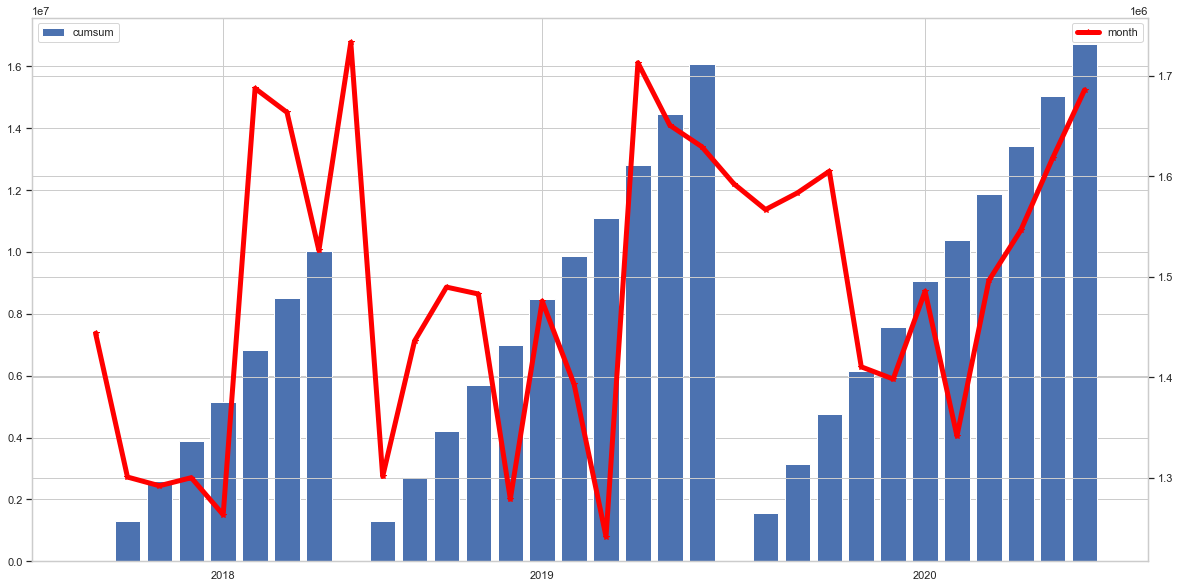

In [13]:
list2 = []
for i in range(32):
    list2.append(17*i)
pig_killed_cum_and_month = pig_killed.loc['돼지'].iloc[:,list2].astype('int64')
# 해당 월마다 전국 돼지 도축 수만 뽑아내기 위한 작업

pig_killed_cum_1 = pd.DataFrame(pig_killed_cum_and_month.loc['누계'][0:8].map(lambda x : x - 7335722)).T
pig_killed_cum_2 = pd.DataFrame(pig_killed_cum_and_month.loc['누계'][8:20].map(lambda x : x - 1733052)).T
pig_killed_cum_3 = pd.DataFrame(pig_killed_cum_and_month.loc['누계'][20:32].map(lambda x : x - 1592642)).T
# 누계 결과값 해당 연도마다 초기화가 되게 함
pig_killed_cum_fin = pd.concat([pig_killed_cum_1, pig_killed_cum_2, pig_killed_cum_3], axis = 1)

pig_killed_month = pd.DataFrame(pig_killed_cum_and_month.loc['당월']).T
                                          

fig, ax1 = plt.subplots(figsize=(20, 10))

ax1.bar(np.arange(32), pig_killed_cum_fin.loc['누계'], label = 'cumsum')
plt.legend(loc = 'upper left')
ax2 = ax1.twinx() # 다른 yticks 두개 이용하기
ax2.plot(np.arange(32), pig_killed_month.loc['당월'], color = 'red', marker = '*', linewidth = 5, label = 'month')
plt.xticks([4,14,26],['2018', '2019', '2020'], rotation=30)
plt.tick_params(axis='x', direction='inout', length=10, labelsize=15, labelcolor='black', width = 0.5)
plt.legend()

# 도축량에 대해서 영향이 미비한 것을 확인

---

<h1>Conclusion</h1>

ASF 와 돼지와는 무조건적인 상관관계가 성립할 것이라고 생각하였으나 축사 돼지와는 연관성이 적다는것을 이번 과제를 통해 알게되었습니다.<br>
대다수 논문은 이 수치데이터를 이용하여 ASF의 영향을 설명하였는데 저와 접근 방법이 다를 수 있으나 ASF 관련 데이터는 축사돼지 보다는 측정하기는 어렵지만 좀더 확실한 멧돼지와 관련된 데이터를 이용하는 것이 맞다고 생각합니다.